<a href="https://colab.research.google.com/github/KiloDragon/HWinn/blob/main/HW1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Math   Eng  DataScience  Russian  Physics  Chemistry  TimeLab  LabWork
0     53.0  40.0         58.0     59.0     30.0       37.0     47.0        4
1     51.0  47.0         50.0     41.0     59.0       58.0     51.0        5
2     51.0  61.0         55.0     41.0     54.0       40.0     38.0        4
3     59.0  50.0         48.0     43.0     62.0       48.0     36.0        4
4     46.0  46.0         55.0     54.0     54.0       54.0     52.0        3
...    ...   ...          ...      ...      ...        ...      ...      ...
1995  52.0  53.0         54.0     61.0     51.0       42.0     55.0        4
1996  49.0  58.0         32.0     32.0     59.0       65.0     52.0        5
1997  37.0  51.0         46.0     47.0     53.0       37.0     53.0        3
1998  39.0  47.0         49.0     39.0     58.0       46.0     49.0        3
1999  46.0  53.0         49.0     58.0     41.0       36.0     51.0        4

[2000 rows x 8 columns]


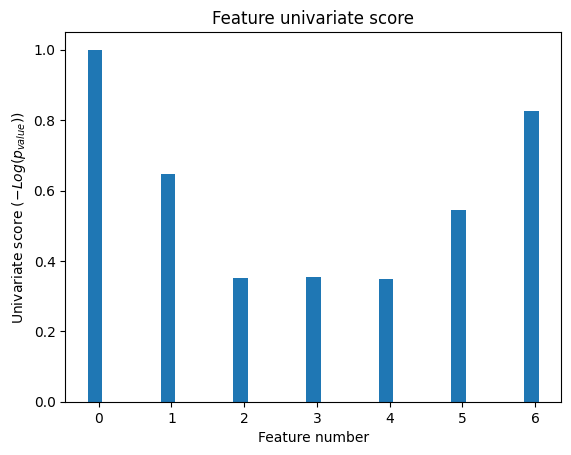

Classification accuracy : 0.665
Оценка :[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

lab_arr = np.arange(3,6)
mu, sigma = 50, 10
mu1, sigma1 = 120, 10
rng = np.random.default_rng(seed=42)
np.random.seed(seed=42)
rints_float = rng.normal(mu, sigma, size=(2000,6))
rints_int = np.round(rints_float)
xU, xL = lab_arr + 0.5, lab_arr - 0.5
prob = ss.norm.cdf(xU,loc=4, scale = 0.5) - ss.norm.cdf(xL,loc=4, scale = 0.5)
prob = prob / prob.sum()
rlab = np.random.choice(lab_arr, size = 2000, p = prob)
rtime_float = rng.normal(mu, sigma, size = (2000,1))
rtime_int = np.round(rtime_float)
df = pd.DataFrame(rints_int, columns=['Math','Eng','DataScience','Russian','Physics','Chemistry'])
df['TimeLab'] = rtime_int
df['LabWork'] = rlab
print(df)
y = df.pop('LabWork')
x = df
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

selector = SelectKBest(f_classif, k=3)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(df.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

#Лучшие признаки 5,3,1 ('Physics','DataScience','Math')

clf_selected = make_pipeline(
    SelectKBest(f_classif, k=3),  LinearSVC(dual=False,max_iter=2000)
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy : {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

def predict_score (Math,Eng,DataScience,Russian,Physics,Chemistry,Time):
    lab_work=clf_selected.predict([[Math,Eng,DataScience,Russian,Physics,Chemistry,Time]])
    return lab_work


print(f"Оценка :{predict_score(10,90,20,30,40,60,180)}")

Сохраняем модель

In [21]:
import joblib
#Сохраняем в файл
joblib_file = "joblib_model.pkl"
joblib.dump(clf_selected, joblib_file)

 # Грузим
joblib_model = joblib.load(joblib_file)

 # Расчет
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))


Test score: 66.52 %
